In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 파일 확인

In [87]:
print(os.getcwd())
os.listdir()

C:\Users\kimhw\바탕 화면\Sogang_Univ\2024_하계\POSTECH_summer_internship\연구참여 참고자료\Michelson\연구참여_김현우


['.ipynb_checkpoints',
 '240710 140 uW, after splicing, interference test near center, manually.csv',
 '240710 140 uW, after splicing, interference test.csv',
 '240710 140 uW, after splicing, interference test_0.1psstip_70to140.csv',
 '240710 140 uW, after splicing, interference test_0.25psstip.csv',
 '240710 140 uW, after splicing, interference test_0.25psstip_70to140.csv',
 '240710 140 uW, after splicing_108_to_113_lowest_spped.csv',
 '240711_0.01ps_100_to_118_central_1분40초오바.csv',
 '240711_0.25ps_70_to_130_org100.csv',
 '240711_0.25ps_80_to_130_org0.csv',
 '240711_100ps.csv',
 '240711_102ps.csv',
 '240711_104ps.csv',
 '240711_106ps.csv',
 '240711_108ps.csv',
 '240711_110ps.csv',
 '240711_112ps.csv',
 '240711_114ps.csv',
 '240711_116ps.csv',
 '240711_118ps.csv',
 '240711_120ps.csv',
 '240711_122ps.csv',
 '240711_124ps.csv',
 '240711_126ps.csv',
 '240711_128ps.csv',
 '240711_130ps.csv',
 '240711_132ps.csv',
 '240711_134ps.csv',
 '240711_136ps.csv',
 '240711_138ps.csv',
 '240711_140ps.

# 99:1 splitter actual ratio

In [91]:
df = pd.read_csv('240711_99_1_splitter_actual_ratio.csv', encoding ='utf8', header = 12)
df.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 5"], inplace = True)
df.rename(columns = {"Power (W)" : "signal",
                     "Power (W).1" : 'pump'}, inplace = True)
df['signal_per_pump'] = df['signal']/df['pump']

df.head()

print('Actual ratio:', df.signal_per_pump.mean())

Actual ratio: 103.40233646138644


# Unstable Laser output

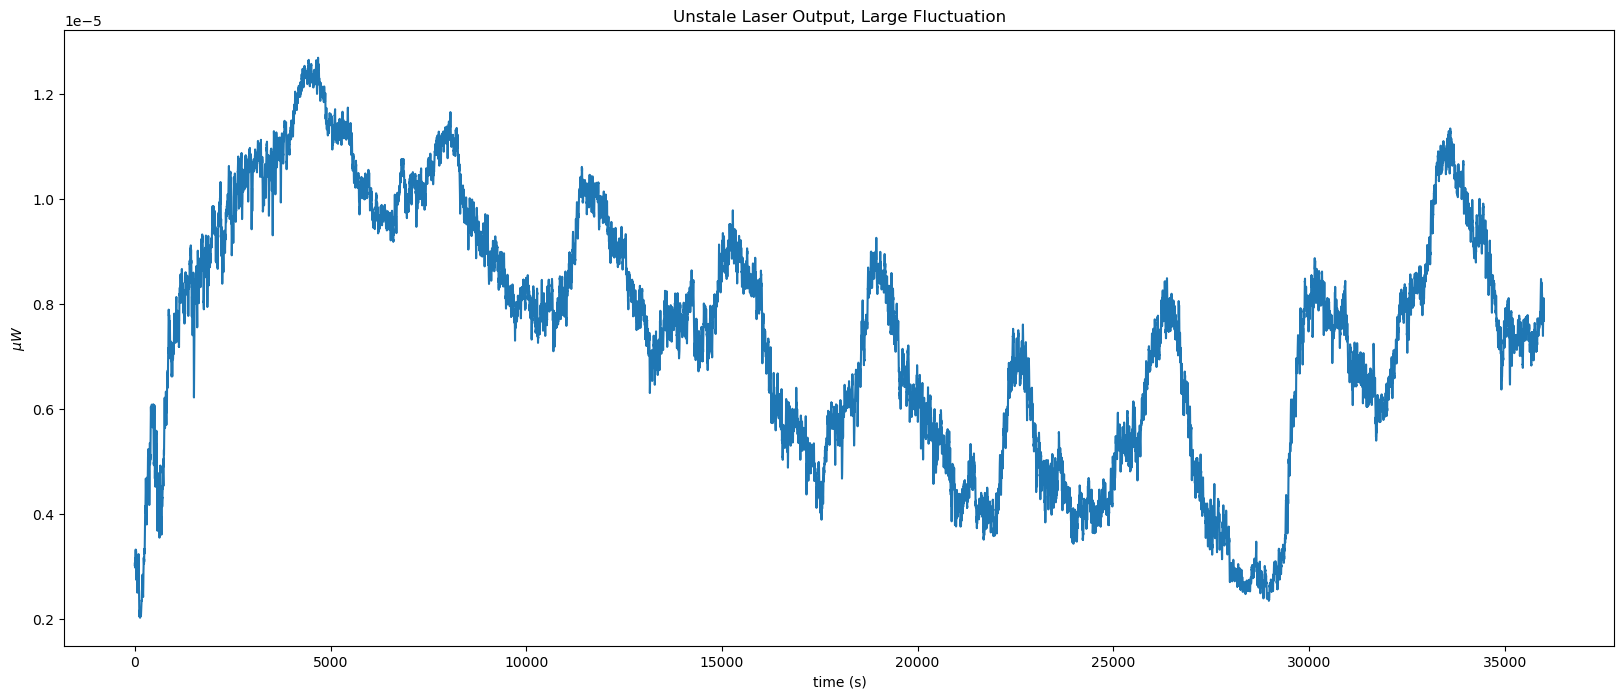

In [277]:
df = pd.read_csv('240710 1% laser log for 10 hours.csv', encoding = 'utf8', header = 12)
df = df[['Power (W)']]

plt.figure(figsize = (20, 8))
plt.plot(df['Power (W)'])
plt.xlabel('time (s)')
plt.ylabel(r'$\mu W$')
plt.title('Unstale Laser Output, Large Fluctuation')

plt.show()

# Central piecture from 74 to 86 / 100 to 118 / 110 to - 119 / 1dot per 0.1sec

In [3]:
df_cen = pd.read_csv('240711_0.01ps_100_to_118_central_1분40초오바.csv', encoding ='utf8', header = 12)
df_cen.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 5"], inplace = True)
df_cen.rename(columns = {"Power (W)" : "signal",
                     "Power (W).1" : 'pump'}, inplace = True)
df_cen['signal_per_pump'] = df_cen['signal']/df_cen['pump']

df_left = pd.read_csv('240712_0.01ps_74_to_86.csv', encoding ='utf8', header = 12)
df_left.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 5"], inplace = True)
df_left.rename(columns = {"Power (W)" : "signal_l",
                     "Power (W).1" : 'pump_l'}, inplace = True)
df_left['signal_per_pump_l'] = df_left['signal_l']/df_left['pump_l']

df_right = pd.read_csv('240712_0.01ps_110_to_119.csv', encoding ='utf8', header = 12)
df_right.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 5"], inplace = True)
df_right.rename(columns = {"Power (W)" : "signal_r",
                     "Power (W).1" : 'pump_r'}, inplace = True)
df_right['signal_per_pump_r'] = df_right['signal_r']/df_right['pump_r']


In [4]:
df_combined_horizontal = pd.concat([df_cen, df_left, df_right], axis=1)
df_combined_horizontal.fillna(0, inplace = True)
df_combined_horizontal.head()

,signal,pump,signal_per_pump,signal_l,pump_l,signal_per_pump_l,signal_r,pump_r,signal_per_pump_r
0,0.000027,0.000001,24.906896,0.000034,0.000002,19.494010,0.000049,0.000002,28.283287
1,0.000025,0.000001,23.545809,0.000034,0.000002,19.505990,0.000004,0.000002,2.145067
2,0.000021,0.000001,19.496189,0.000034,0.000002,19.502567,0.000021,0.000002,12.066601
3,0.000012,0.000001,11.464571,0.000034,0.000002,19.450100,0.000042,0.000002,24.401605
4,0.000017,0.000001,15.904682,0.000034,0.000002,19.466158,0.000011,0.000002,6.132256


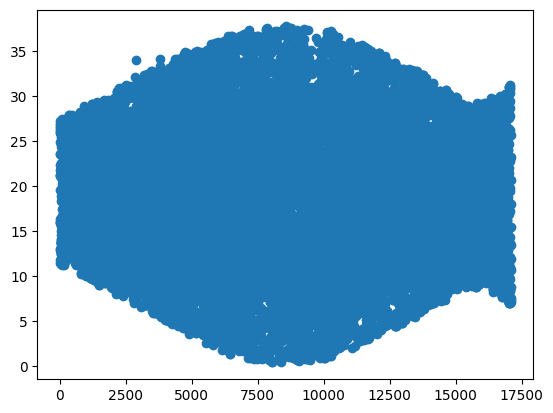

In [5]:
plt.scatter(df_cen.index, y = df_cen.signal_per_pump)

In [6]:
visibility = (np.max(df_cen.signal_per_pump) - np.min(df_cen.signal_per_pump)) / (np.max(df_cen.signal_per_pump) + np.min(df_cen.signal_per_pump))
print(f'visibility = {visibility}')

visibility = 0.98097653113821


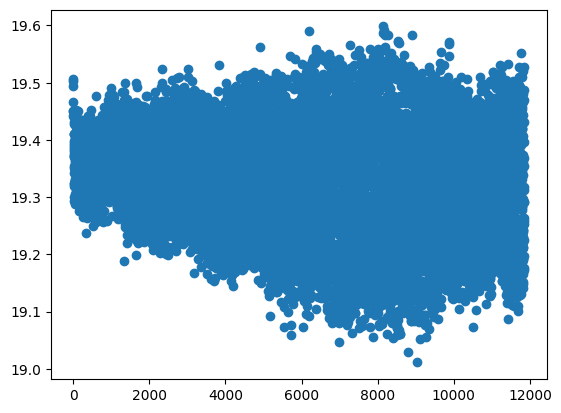

In [7]:
plt.scatter(df_left.index, y = df_left.signal_per_pump_l)

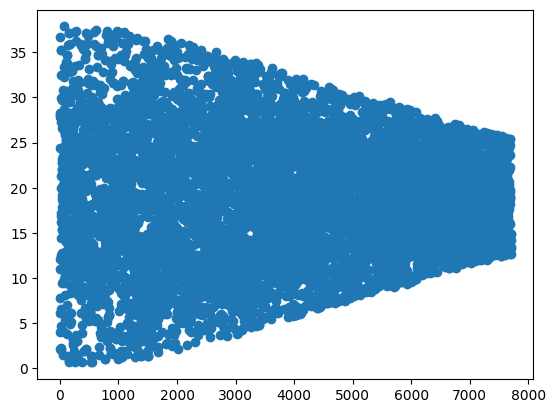

In [8]:
plt.scatter(df_right.index[:7700], y = df_right.signal_per_pump_r[:7700])

## 74-83 / 100-115 / 116-118

In [19]:
df_l_modified = df_left[:9000]
df_cen_modified = df_cen[:15000]
df_r_modified = df_right[6000:8000]

coordinates = [(0.001*x + 74, df_l_modified.iloc[x].signal_per_pump_l) for x in df_l_modified.index]
central_coordinates = [(0.001*x + 100, df_cen_modified.iloc[x].signal_per_pump) for x in df_cen_modified.index]
right_coordinates = [(0.001*x + 116, df_r_modified.iloc[x-6000].signal_per_pump_r) for x in df_r_modified.index]

In [20]:
print(len(coordinates))
print(len(central_coordinates))
print(len(right_coordinates))

9000
15000
2000


In [21]:
coordinates.extend(central_coordinates)
coordinates.extend(right_coordinates)

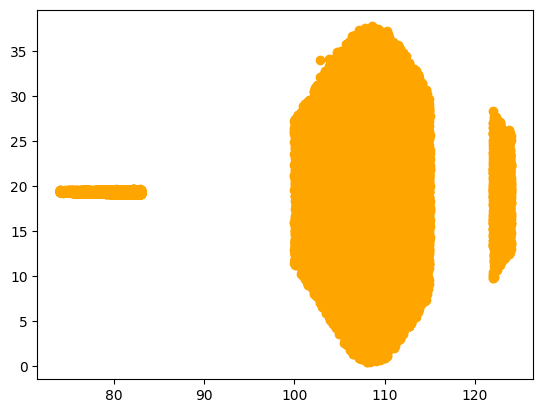

In [22]:
x_values = [x for x, y in coordinates]
y_values = [y for x, y in coordinates]

plt.scatter(x_values, y_values, color = 'orange', marker = 'o')
plt.show()

### Extract Local maximum

In [27]:
len(coordinates)

26000

In [29]:
mean = np.mean([y for _, y in coordinates])

above_avg = []
for i in coordinates:
    if i[1] >= mean:
        above_avg.append(i)

In [31]:
len(above_avg)

16832

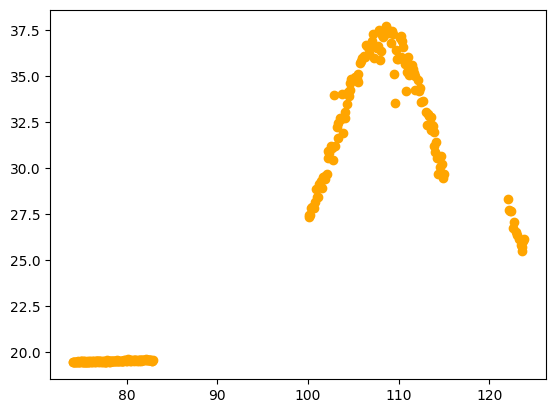

265


In [33]:
local_max = []
for i in range(30, len(above_avg)-30):
    if all(above_avg[i][1] > above_avg[i-j][1] for j in range(1, 31)) and \
       all(above_avg[i][1] > above_avg[i+j][1] for j in range(1, 31)):
        local_max.append(above_avg[i])

x_values = [x for x, y in local_max]
y_values = [y for x, y in local_max]

plt.scatter(x_values, y_values, color='orange', marker='o')
plt.show()
print(len(local_max))

In [35]:
local_max = local_max[:-14]
len(local_max)

251

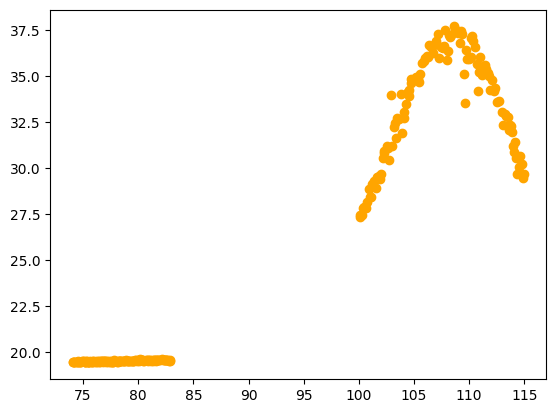

251


In [41]:
x_values = [x for x, y in local_max]
y_values = [y for x, y in local_max]

plt.scatter(x_values, y_values, color='orange', marker='o')
plt.show()
print(len(local_max))

Amplitude: 17.521666821596053, Center: 108.3722455675887, Width: 6.4402479364257585


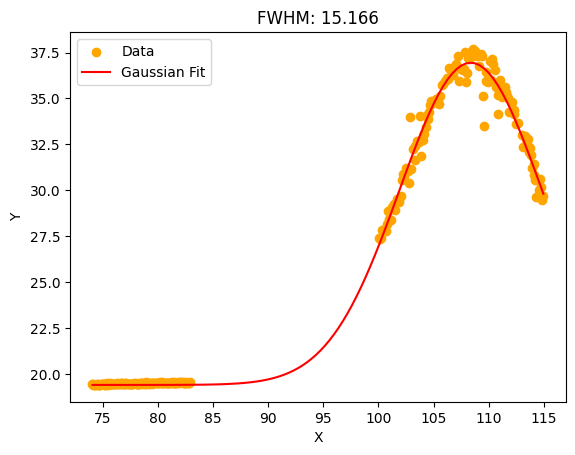

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 주어진 데이터 (여기서는 예시로 사용합니다. 실제 데이터로 교체하세요)
x_data = np.array(x_values)
y_data = np.array(y_values)

# 가우시안 함수 정의
def gaussian(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / (2*wid**2)) + np.min(y_data)

# 초기 추정값
initial_guess = [np.max(y_data), np.mean(x_data*2), np.std(x_data)]

# 가우시안 피팅
popt, pcov = curve_fit(gaussian, x_data, y_data, p0=initial_guess)

# FWHM 계산
FWHM = 2 * np.sqrt(2 * np.log(2)) * wid

# 피팅 결과
amp, cen, wid = popt
print(f"Amplitude: {amp}, Center: {cen}, Width: {wid}")

# 피팅 곡선 계산
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = gaussian(x_fit, *popt)

# 결과 시각화
plt.scatter(x_data, y_data,color = 'orange', label='Data')
plt.plot(x_fit, y_fit, label='Gaussian Fit', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'FWHM: {FWHM:.3f}')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 가우시안 함수 정의
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2)) + np.min(max_list)
    
# x 값 설정 (0부터 max_list의 길이 - 1까지)
x = np.arange(len(max_list)) # 한 칸 당 2 ps씩 의미하므로

# y 값 설정 (max_list)
y = np.array(max_list)

# 초기 추정값 설정: [최대 y값, x의 평균, x의 표준편차]
p0 = [np.max(y), np.mean(x*2), np.std(x)]

# 가우시안 피팅
if 1:
    popt, pcov = curve_fit(gaussian, x*2, y, p0=p0)
    # 피팅된 파라미터 추출
    amplitude_fitted, mean_fitted, stddev_fitted = popt

    # FWHM 계산
    FWHM = 2 * np.sqrt(2 * np.log(2)) * stddev_fitted

    # 피팅된 가우시안 함수 계산
    y_fitted = gaussian(x*2, amplitude_fitted, mean_fitted, stddev_fitted)

    # 그래프 그리기
    plt.figure(figsize = (10,6))
    plt.plot(x*2, y, 'b-', label='data')
    plt.plot(x * 2, y_fitted, 'r-', label=f'fit: amp={amplitude_fitted:.3f}, mean={mean_fitted:.3f}, std={stddev_fitted:.3f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc = 'best')
    plt.title(f'FWHM: {FWHM:.3f}')
    plt.show()

# except RuntimeError as e:
#     print(f"Error - curve_fit failed: {e}")
# except Exception as e:
#     print(f"Unexpected error: {e}")


## Gaussian fitting 

upper peak만을 골라내야 예쁜 가우시안을 뽑을 수 있음

In [233]:
df = pd.read_csv('240711_0.01ps_100_to_118_central_1분40초오바.csv', encoding ='utf8', header = 12)
df.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 5"], inplace = True)
df.rename(columns = {"Power (W)" : "signal",
                     "Power (W).1" : 'pump'}, inplace = True)
df['signal_per_pump'] = df['signal']/df['pump']

In [247]:
above_avg
np.array([y for x, y in above_avg])

array([19.49401027, 19.50598973, 19.50256703, ..., 19.64552563,
       20.14321331, 20.54130724])

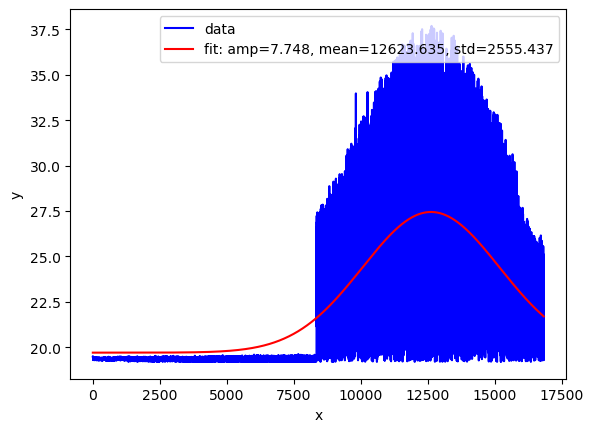

In [251]:
from scipy.optimize import curve_fit

# 가우시안 함수 정의
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2)) + 19.7

# x 값 설정 (0부터 max_list의 길이 - 1까지)
x = np.arange(len(above_avg))

# y 값 설정 (max_list)
y = np.array([y for x, y in above_avg])

# 초기 추정값 설정: [최대 y값, x의 평균, x의 표준편차]
p0 = [np.max(y), np.mean(x), np.std(x)]

# 가우시안 피팅
try:
    popt, pcov = curve_fit(gaussian, x, y, p0=p0)
    # 피팅된 파라미터 추출
    amplitude_fitted, mean_fitted, stddev_fitted = popt

    # 피팅된 가우시안 함수 계산
    y_fitted = gaussian(x, amplitude_fitted, mean_fitted, stddev_fitted)

    # 그래프 그리기
    plt.plot(x, y, 'b-', label='data')
    plt.plot(x, y_fitted, 'r-', label='fit: amp=%5.3f, mean=%5.3f, std=%5.3f' % (amplitude_fitted, mean_fitted, stddev_fitted))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
except RuntimeError as e:
    print(f"Error - curve_fit failed: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")


한 점을 기준으로 좌우로 2칸씩 비교했을 때, 자신이 가장 크다면, 오류를 감안한 local maximum일 확률이 높지 않을까?

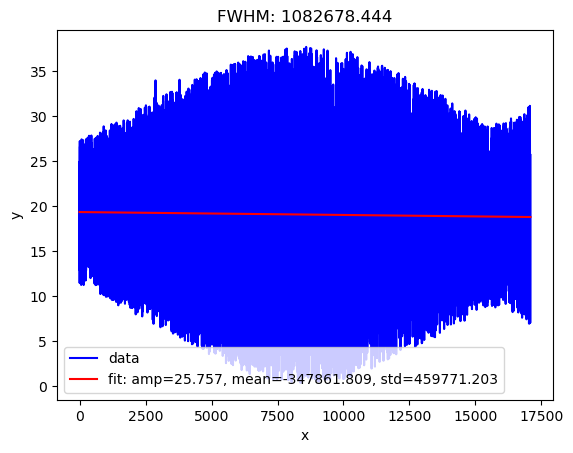

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 가우시안 함수 정의
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2)) 

# x 값 설정
x = np.arange(len(df.signal_per_pump))
# y 값 설정
y = np.array(df.signal_per_pump)

# 초기 추정값 설정
p0 = [np.max(y), np.mean(x), np.std(x)]

# 가우시안 피팅
try:
    popt, pcov = curve_fit(gaussian, x, y, p0=p0)
    amplitude_fitted, mean_fitted, stddev_fitted = popt

    # 피팅된 가우시안 함수 계산
    y_fitted = gaussian(x, amplitude_fitted, mean_fitted, stddev_fitted)

    # FWHM 계산
    FWHM = 2 * np.sqrt(2 * np.log(2)) * stddev_fitted

    # 그래프 그리기
    plt.plot(x, y, 'b-', label='data')
    plt.plot(x, y_fitted, 'r-', label='fit: amp=%5.3f, mean=%5.3f, std=%5.3f' % (amplitude_fitted, mean_fitted, stddev_fitted))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'FWHM: {FWHM:.3f}')
    plt.show()

except RuntimeError as e:
    print(f"Error - curve_fit failed: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")


# Entire data from 80ps to 130ps / 0.25ps/s

In [60]:
df = pd.read_csv('240711_0.25ps_80_to_130_org0.csv', encoding = 'utf-8', header = 12)
df.head()
df.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 5"], inplace = True)
df.rename(columns = {"Power (W)" : "signal",
                     "Power (W).1" : 'pump'}, inplace = True)
df['signal_per_pump'] = df['signal']/df['pump']

df.head()

,signal,pump,signal_per_pump
0,0.000016,8.247200e-07,19.657581
1,0.000016,8.229500e-07,19.494501
2,0.000016,8.237000e-07,19.473109
3,0.000016,8.254700e-07,19.477389
4,0.000016,8.238300e-07,19.484602


### 보정 안 한 그대로

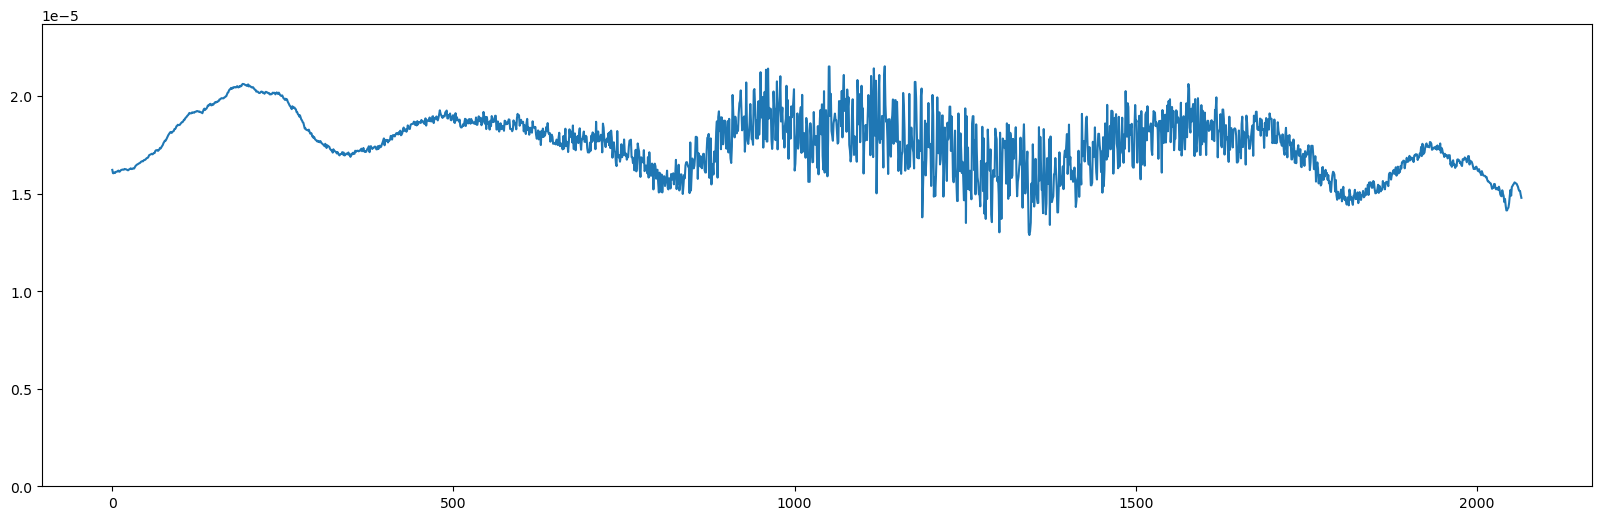

In [62]:
plt.figure(figsize = (20, 6))
plt.plot( df.signal)
plt.ylim(0, df.signal.max()*1.1)
# plt.scatter(df.index, df.signal_per_pump)

plt.show()

### signal/pump로 보정한 그래프

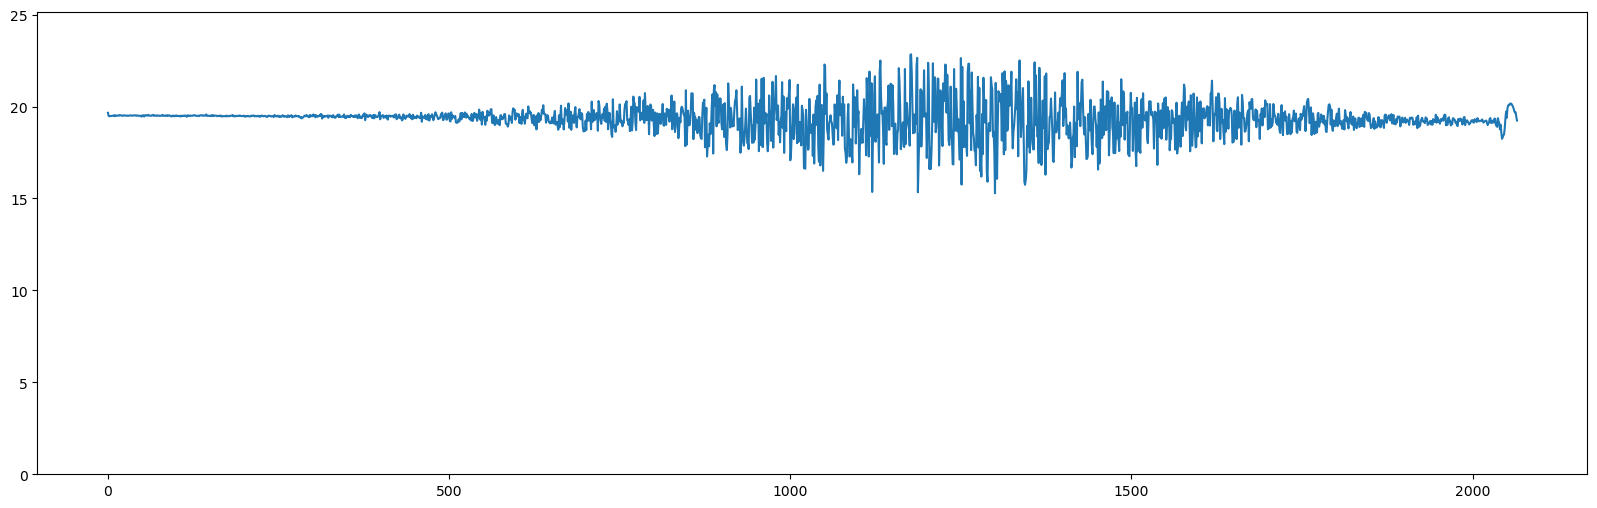

In [63]:
plt.figure(figsize = (20, 6))
plt.plot( df.signal_per_pump)
plt.ylim(0, df.signal_per_pump.max()*1.1)
# plt.scatter(df.index, df.signal_per_pump)

plt.show()

# Envelope check 70 to 140

### 240711 측정

In [39]:
ps = 70

max_no_corr = []
min_no_corr = []
max_list = []
min_list = []

while (ps <= 140):
    file_name = f"240711_{ps}ps.csv"
    
    df = pd.read_csv(file_name, encoding = 'utf-8', header =12)
    df.drop(columns = ["Samples ", "Date (MM/dd/yyyy) ",  "Time of day (hh:mm:ss) ", "Unnamed: 5"], inplace = True)
    df.rename(columns = {"Power (W)" : "signal",
                         "Power (W).1" : 'pump'}, inplace = True)
    df['signal_per_pump'] = df['signal']/df['pump']
    
    sigpmp_max_idx = df.signal_per_pump.idxmax()
    sigpmp_min_idx = df.signal_per_pump.idxmin()
    max = df.iloc[sigpmp_max_idx].signal_per_pump
    min = df.iloc[sigpmp_min_idx].signal_per_pump

    max_no_corr.append(df.signal.max())
    min_no_corr.append(df.signal.min())
    
    max_list.append(max)
    min_list.append(min)
    

    ps += 2

### signal & max 보정 안 한 envelope

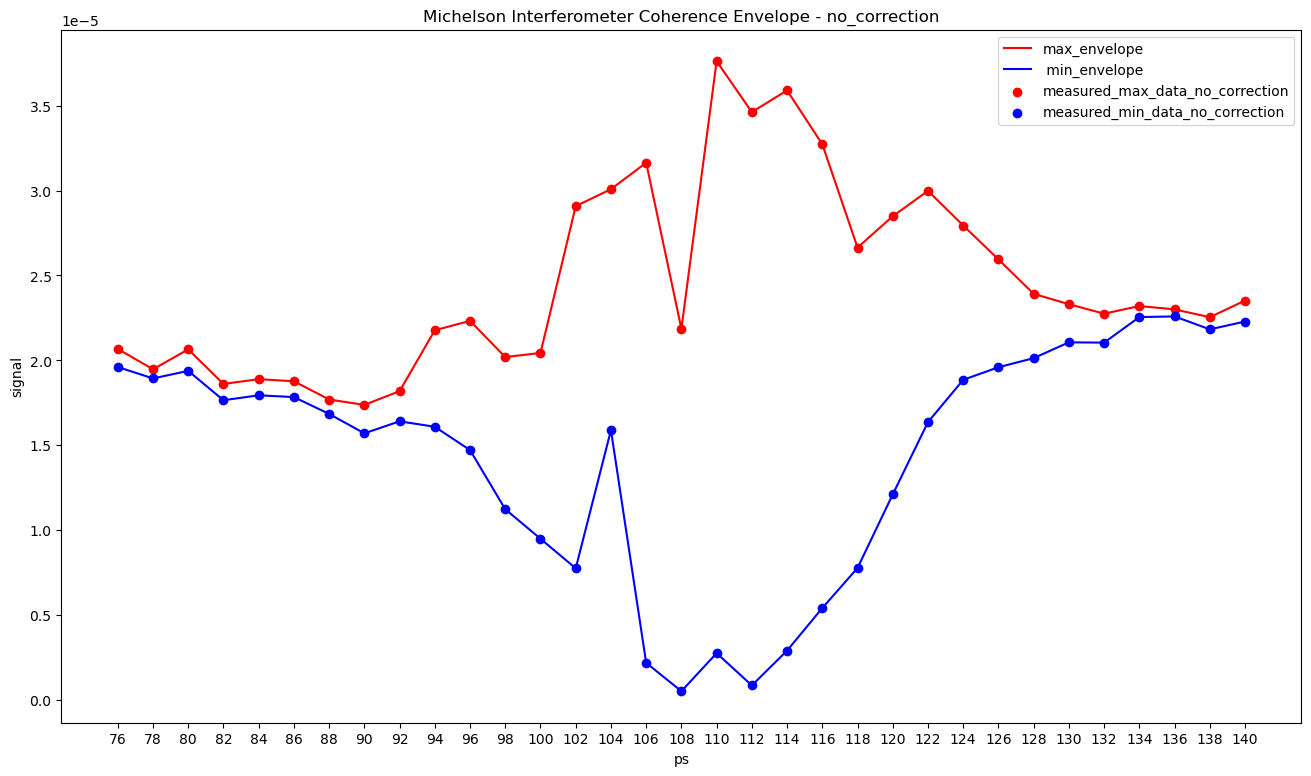

In [37]:
# 70~74는 꼬리 부분이 길어져서 버림

plt.figure(figsize = (16,9))

x = np.linspace(76, 140, 33)
plt.plot(x, max_no_corr[3:], c= 'r', label = 'max_envelope')
plt.plot(x, min_no_corr[3:], c = 'b', label = ' min_envelope')
plt.scatter(x, max_no_corr[3:], c= 'r', label = 'measured_max_data_no_correction')
plt.scatter(x, min_no_corr[3:], c= 'b', label = 'measured_min_data_no_correction')

plt.xticks(np.arange(76, 141, 2))
plt.xlabel('ps')
plt.ylabel("signal")
plt.title("Michelson Interferometer Coherence Envelope - no_correction")

plt.legend()
plt.show()

### signal/pump로 보정한 envelope

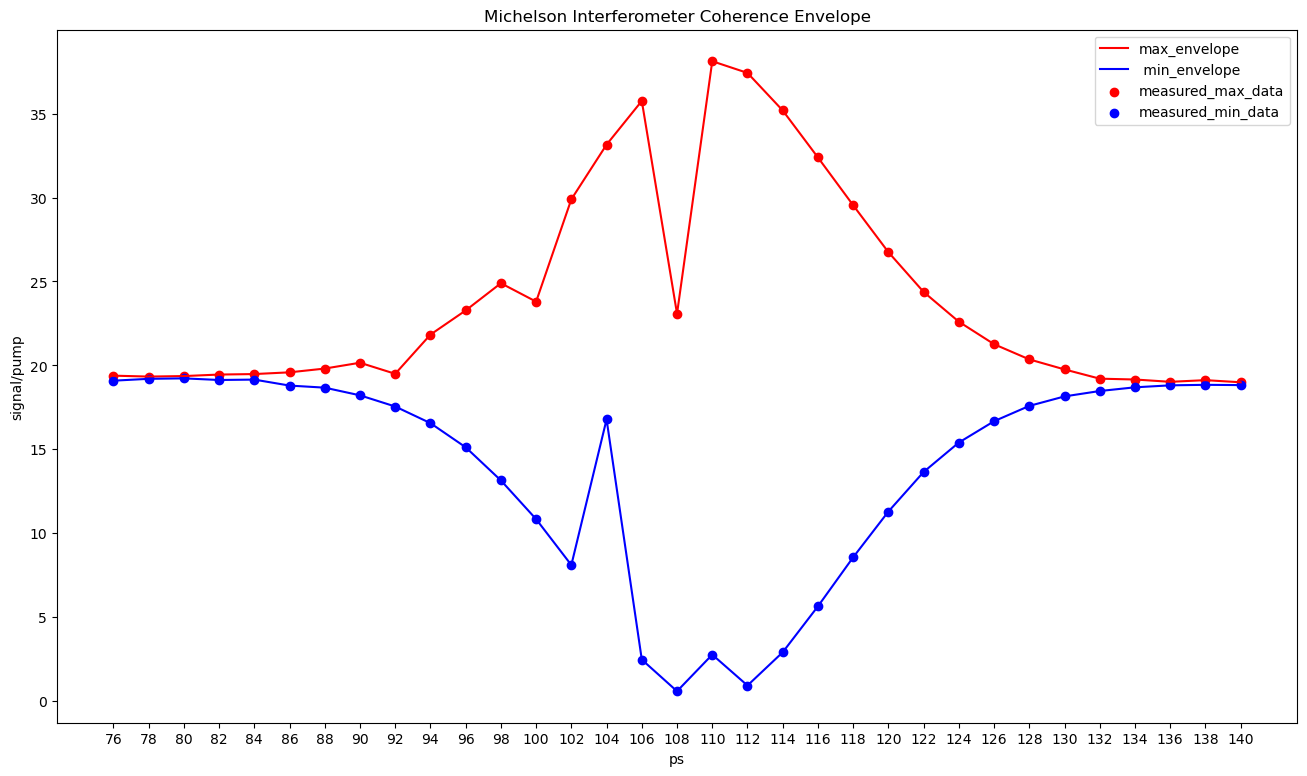

In [40]:
# 70~74는 꼬리 부분이 길어져서 버림

plt.figure(figsize = (16,9))

x = np.linspace(76, 140, 33)
plt.plot(x, max_list[3:], c= 'r', label = 'max_envelope')
plt.plot(x, min_list[3:], c = 'b', label = ' min_envelope')
plt.scatter(x, max_list[3:], c= 'r', label = 'measured_max_data')
plt.scatter(x, min_list[3:], c= 'b', label = 'measured_min_data')

plt.xticks(np.arange(76, 141, 2))
plt.xlabel('ps')
plt.ylabel("signal/pump")
plt.title("Michelson Interferometer Coherence Envelope")

plt.legend()
plt.show()

In [32]:
visibility = (np.max(max_list) - np.min(min_list)) / (np.max(max_list) + np.min(min_list))
print(f'visibility = {visibility}')

visibility = 0.9724987151382932


### 240712 찌그러진 모양때문에 재측정

In [6]:
import pandas as pd

ps = 70

max_list = []
min_list = []

while ps <= 146:
    if ps in [100, 102, 104, 106, 108, 110, 142, 144, 146]: # 새로 찍은 데이터들
        file_name = f"240712_{ps}ps.csv" 
    else:
        file_name = f"240711_{ps}ps.csv"
    
    try:
        df = pd.read_csv(file_name, encoding='utf-8', header=12)
        df.drop(columns=["Samples ", "Date (MM/dd/yyyy) ", "Time of day (hh:mm:ss) ", "Unnamed: 5"], inplace=True)
        df.rename(columns={"Power (W)": "signal", "Power (W).1": 'pump'}, inplace=True)
        df['signal_per_pump'] = df['signal'] / df['pump']
        
        sigpmp_max_idx = df.signal_per_pump.idxmax()
        sigpmp_min_idx = df.signal_per_pump.idxmin()
        max_value = df.iloc[sigpmp_max_idx].signal_per_pump
        min_value = df.iloc[sigpmp_min_idx].signal_per_pump
        
        max_list.append(max_value)
        min_list.append(min_value)
    except FileNotFoundError:
        print(f"File not found: {file_name}")
    
    ps += 2


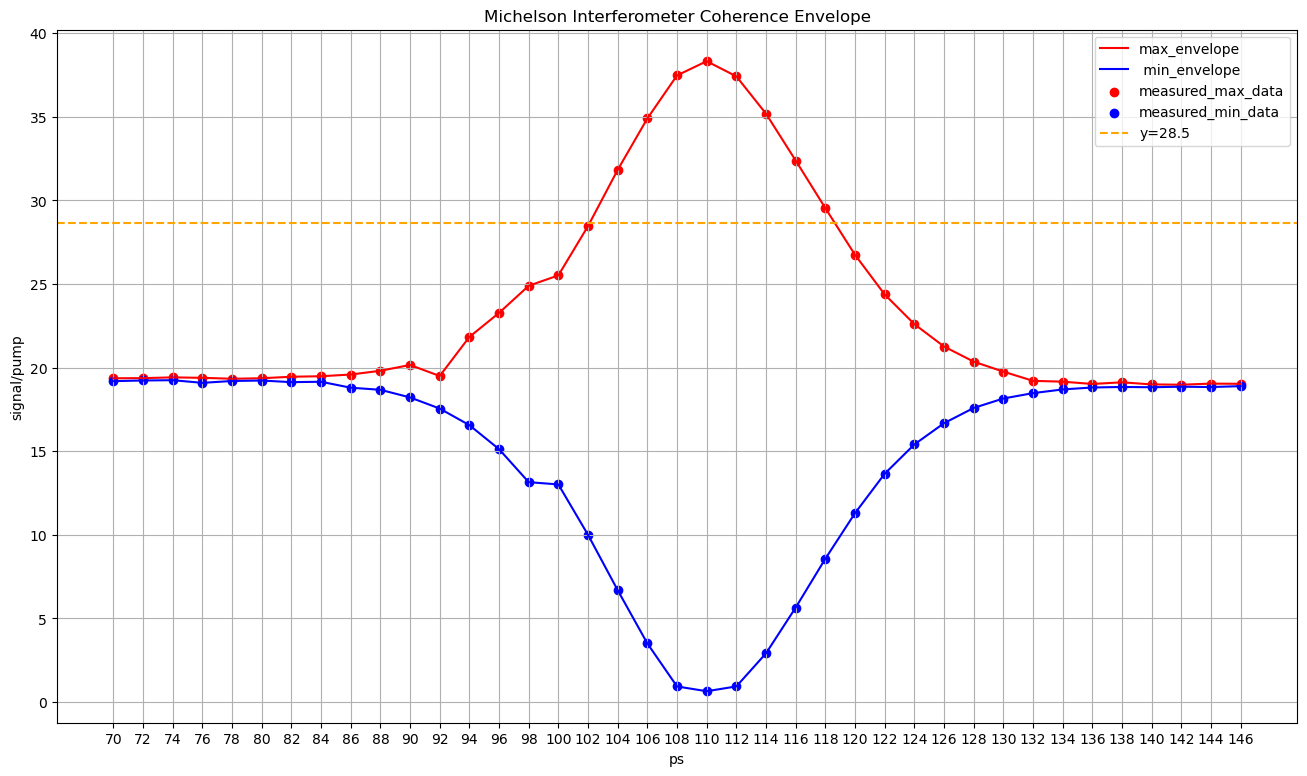

visibility = 0.9669794593347648


In [7]:
plt.figure(figsize = (16,9))

# x = np.linspace(70, 140, 39)
plt.plot(range(70, 147, 2), max_list, c= 'r', label = 'max_envelope')
plt.plot(range(70, 147, 2), min_list, c = 'b', label = ' min_envelope')
plt.scatter(range(70, 147, 2), max_list, c= 'r', label = 'measured_max_data')
plt.scatter(range(70, 147, 2), min_list, c= 'b', label = 'measured_min_data')

plt.axhline(y=(np.max(max_list) - np.min(max_list)) / 2 + np.min(max_list) , color='r', linestyle='--', label='y=28.5', c = 'orange')

plt.xticks(np.arange(70, 147, 2))
plt.xlabel('ps')
plt.ylabel("signal/pump")
plt.title("Michelson Interferometer Coherence Envelope")

plt.grid()
plt.legend()
plt.show()

print(f"visibility = {(np.max(max_list)-np.min(min_list)) / (np.max(max_list) + np.min(min_list))}")

## Gaussian fitting

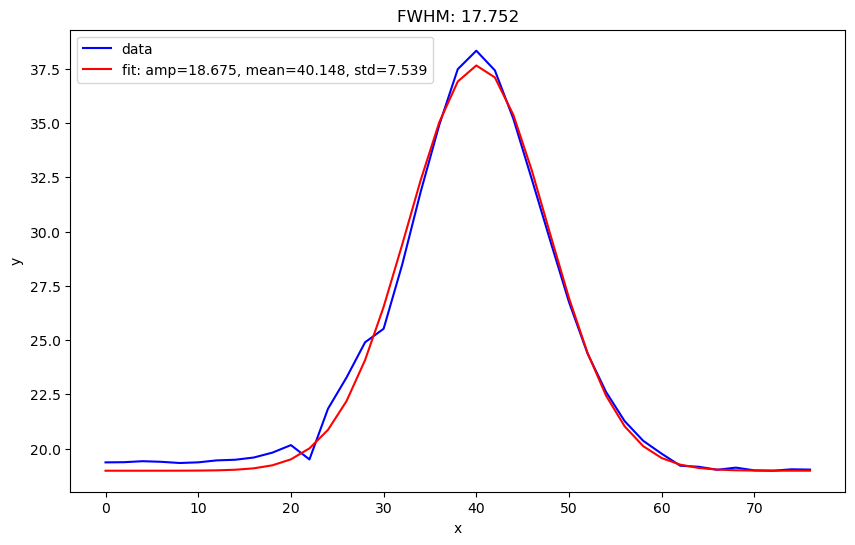

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 가우시안 함수 정의
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2)) + np.min(max_list)
    
# x 값 설정 (0부터 max_list의 길이 - 1까지)
x = np.arange(len(max_list)) # 한 칸 당 2 ps씩 의미하므로

# y 값 설정 (max_list)
y = np.array(max_list)

# 초기 추정값 설정: [최대 y값, x의 평균, x의 표준편차]
p0 = [np.max(y), np.mean(x*2), np.std(x)]

# 가우시안 피팅
if 1:
    popt, pcov = curve_fit(gaussian, x*2, y, p0=p0)
    # 피팅된 파라미터 추출
    amplitude_fitted, mean_fitted, stddev_fitted = popt

    # FWHM 계산
    FWHM = 2 * np.sqrt(2 * np.log(2)) * stddev_fitted

    # 피팅된 가우시안 함수 계산
    y_fitted = gaussian(x*2, amplitude_fitted, mean_fitted, stddev_fitted)

    # 그래프 그리기
    plt.figure(figsize = (10,6))
    plt.plot(x*2, y, 'b-', label='data')
    plt.plot(x * 2, y_fitted, 'r-', label=f'fit: amp={amplitude_fitted:.3f}, mean={mean_fitted:.3f}, std={stddev_fitted:.3f}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(loc = 'best')
    plt.title(f'FWHM: {FWHM:.3f}')
    plt.show()

# except RuntimeError as e:
#     print(f"Error - curve_fit failed: {e}")
# except Exception as e:
#     print(f"Unexpected error: {e}")


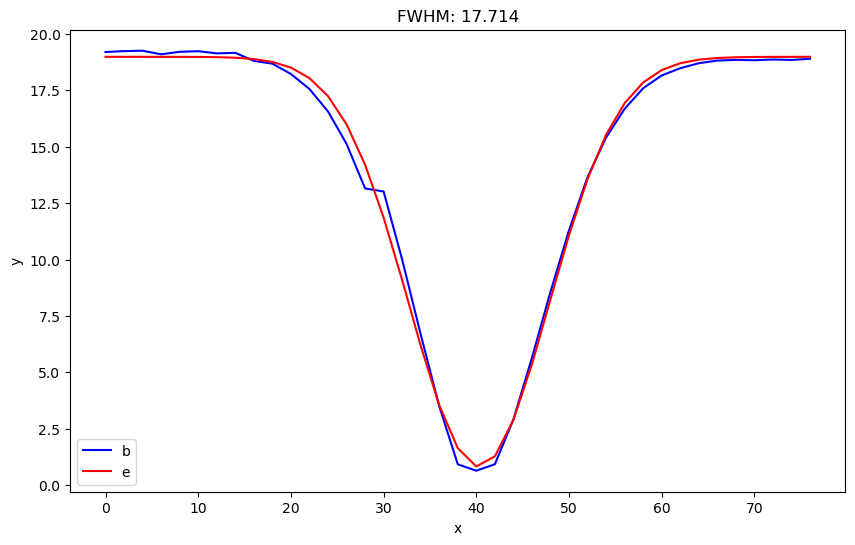

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 가우시안 함수 정의
def gaussian(x, amplitude, mean, stddev):
    return -amplitude * np.exp(-((x - mean) ** 2) / (2 * stddev ** 2)) + np.min(max_list)
    
# x 값 설정 (0부터 max_list의 길이 - 1까지)
x = np.arange(len(min_list))

# y 값 설정 (min_list)
y = np.array(min_list)

# 초기 추정값 설정: [최대 y값, x의 평균, x의 표준편차]
p0 = [np.min(y), np.mean(x*2), np.std(x)]

# 가우시안 피팅
try:
    popt, pcov = curve_fit(gaussian, x*2, y, p0=p0)
    # 피팅된 파라미터 추출
    amplitude_fitted, mean_fitted, stddev_fitted = popt

    # FWHM 계산
    FWHM = 2 * np.sqrt(2 * np.log(2)) * stddev_fitted

    # 피팅된 가우시안 함수 계산
    y_fitted = gaussian(x*2, amplitude_fitted, mean_fitted, stddev_fitted)

    # 그래프 그리기
    plt.figure(figsize = (10,6))
    plt.plot(x*2, y, 'b-', label='data')
    plt.plot(x*2, y_fitted, 'r-', label='fit: amp=%5.3f, mean=%5.3f, std=%5.3f' % (amplitude_fitted, mean_fitted, stddev_fitted))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend('best')
    plt.title(f'FWHM: {FWHM:.3f}')
    plt.show()

except RuntimeError as e:
    print(f"Error - curve_fit failed: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")
